<a href="https://colab.research.google.com/github/Hanishkaa01/DEEP-LEARNING-TECHNIQUES-LAB-EXP/blob/main/exp13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Checking GPU availability...
✅ GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

🔹 Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
✔ Dataset loaded successfully!

🔹 Preprocessing images...
✔ Preprocessing done!

🔹 Loading Pre-trained VGG16 model...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

🔹 Compiling model...
✔ Model compiled successfully!

🔹 Starting training...
Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 226ms/step - accuracy: 0.1073 - loss: 2.4097 - val_accuracy: 0.2460 - val_loss: 2.2253
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 193ms/step - accuracy: 0.1485 - loss: 2.2735 - val_accuracy: 0.2810 - val_loss: 2.1615
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 200ms/step - accuracy: 0.1882 - loss: 2.1979 - val_accuracy: 0.3350 - val_loss: 2.1078

✔ Training complete!


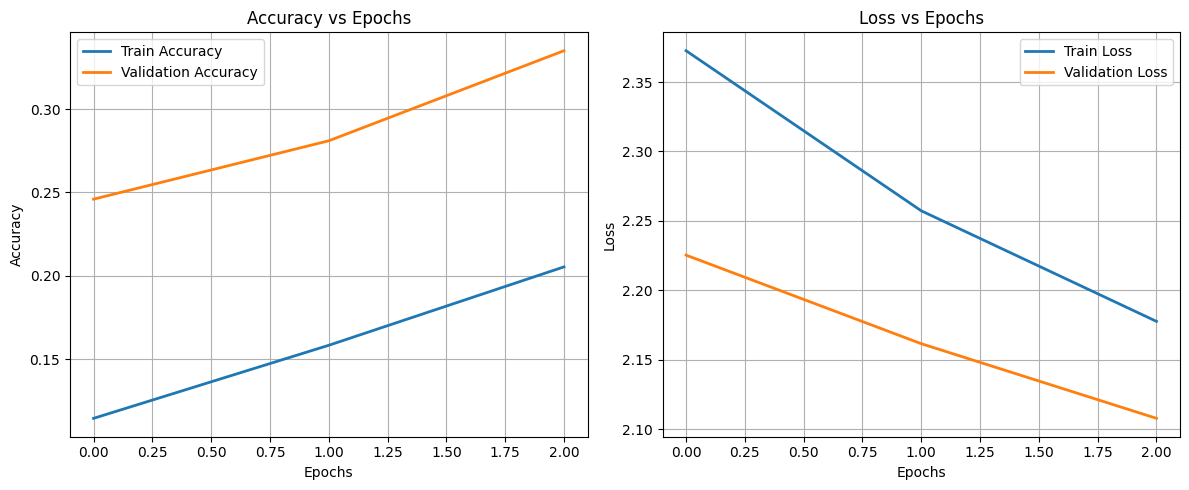


🔹 Evaluating model performance...

📊 Classification Report:

              precision    recall  f1-score   support

    airplane       0.33      0.66      0.44       103
  automobile       0.41      0.36      0.38        89
        bird       0.32      0.12      0.18       100
         cat       0.60      0.03      0.06       103
        deer       0.24      0.34      0.28        90
         dog       0.30      0.03      0.06        86
        frog       0.26      0.70      0.38       112
       horse       0.45      0.25      0.33       102
        ship       0.53      0.22      0.31       106
       truck       0.43      0.54      0.48       109

    accuracy                           0.34      1000
   macro avg       0.39      0.33      0.29      1000
weighted avg       0.39      0.34      0.29      1000


📈 Confusion Matrix:

[[68  4  0  0  7  0  7  2  8  7]
 [17 32  1  0  0  0  7  5  1 26]
 [17  5 12  0 14  3 41  6  2  0]
 [11  6  7  3 14  0 51  3  0  8]
 [11  2  2  0 31  1 36  4

In [ ]:
# ==========================================
# Analyze & Train a Pre-trained VGG16 on CIFAR-10
# (Feature extraction + Performance Metrics)
# ==========================================

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import time

# ------------------------------------------------------------
# 1. GPU Check
# ------------------------------------------------------------
print("🔹 Checking GPU availability...")
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("✅ GPU Available:", gpus)
else:
    print("❌ No GPU detected — running on CPU")

start_time = time.time()

# ------------------------------------------------------------
# 2. Load CIFAR-10 Dataset
# ------------------------------------------------------------
print("\n🔹 Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("✔ Dataset loaded successfully!")

# Smaller subset for faster demo (optional)
x_train, y_train = x_train[:5000], y_train[:5000]
x_test, y_test = x_test[:1000], y_test[:1000]

# ------------------------------------------------------------
# 3. Preprocess Data (Resize + Normalize)
# ------------------------------------------------------------
print("\n🔹 Preprocessing images...")
x_train = tf.image.resize(x_train, (224, 224)) / 255.0
x_test = tf.image.resize(x_test, (224, 224)) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print("✔ Preprocessing done!")

# ------------------------------------------------------------
# 4. Load Pre-trained Model (VGG16)
# ------------------------------------------------------------
print("\n🔹 Loading Pre-trained VGG16 model...")
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze convolutional base
for layer in base_model.layers:
    layer.trainable = False

# ------------------------------------------------------------
# 5. Add Custom Classification Head
# ------------------------------------------------------------
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# ------------------------------------------------------------
# 6. Compile Model
# ------------------------------------------------------------
print("\n🔹 Compiling model...")
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print("✔ Model compiled successfully!")

# ------------------------------------------------------------
# 7. Train Model
# ------------------------------------------------------------
print("\n🔹 Starting training...")
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=3,           # Increase to 10 for better accuracy
    batch_size=32,
    verbose=1
)

print("\n✔ Training complete!")

# ------------------------------------------------------------
# 8. Plot Accuracy vs Epochs and Loss vs Epochs
# ------------------------------------------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 9. Evaluate Model Performance
# ------------------------------------------------------------
print("\n🔹 Evaluating model performance...")
y_pred = model.predict(x_test, verbose=0)
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\n📊 Classification Report:\n")
print(classification_report(
    y_true, y_pred_classes,
    target_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
))

print("\n📈 Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred_classes))

print("\n✅ Total Execution Time: {:.2f} seconds".format(time.time() - start_time))
